# <font color=Red>--------------------------------------Census Income Project----------------------------------------</font>

- Introduction Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

## Problem Defination:
### Predict whether income exceeds $50K/yr based on census data.

#### Attribute Information:

- age: continuous.

- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, - 10th, Doctorate, 5th-6th, Preschool.

- education-num: continuous.

- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-- inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- sex: Female, Male.
- 
- **capital-gain: continuous.

- capital-loss: continuous.

- hours-per-week: continuous.

- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, - Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, - Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-- Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- fnlwgt: continuous.



- The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. - These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are: 1. A - age and sex.

- We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.
 
- The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

 # <span style='background :yellow' > Importing Libraries </span>

In [2]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [3]:
df = pd.read_csv("census_income.csv")


In [4]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [5]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
df.sample(10)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
30909,38,Private,210610,Assoc-acdm,12,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,40,United-States,>50K
21748,72,Private,56559,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,12,United-States,<=50K
14234,48,Private,94342,Bachelors,13,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,55,United-States,<=50K
543,27,Private,201872,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,United-States,<=50K
5796,22,Private,206861,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
1655,26,?,211798,HS-grad,9,Separated,?,Unmarried,White,Female,0,0,40,United-States,<=50K
5941,26,Private,213799,10th,6,Never-married,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
30239,18,Private,189924,HS-grad,9,Never-married,Sales,Own-child,White,Female,0,0,24,United-States,<=50K
4845,45,Private,77764,Assoc-acdm,12,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
12073,33,Self-emp-inc,239018,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,<=50K


In [7]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
df.shape

(32560, 15)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Observation:
- As we can that this dataset is a healthy mix of both categorical and integer type of datatypes.

- We have 9 object datatypes
- we have 6 integer datatypes
- Workclass, Education, Marital_status, Occupation, Relationship, Race, Sex, Native_country are all categorical in nature, as is the case with the target variable Income.

- While Age, Fnlwgt, Education_num, Capital_gain, Capital_loss, Hours_per_week are continuous in nature.

In [10]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Conclusion
- Mean age is 38 and mode is 37, the age range is 17 - 90 while IQR is 28 - 48.

- Education number is just encoded data for education, most of the people have max education level of some college.

- For both capital gain and capital loss we can see that most of the data is around 0.

- For hours per week most of the data is centered towards 40 hours per week.

## Regarding problem statement output variable in continuous number. So it is regression problem. Item outlet sales is our target

# <span style='background :yellow' > Check the duplicate the value </span>

In [16]:

duplicated_values = df.duplicated()
print(duplicated_values.sum())

0


In [19]:
df.shape

(32536, 15)

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(32536, 15)

# <span style='background :yellow' > Check unique values in dataset </span>

In [22]:
df.apply(lambda x: len(x.unique()))

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

## Observation
- These are the number of unique values present in each columns.Income holds only 2 values.

# <span style='background :yellow' > Preprocessing the dataset </span>

# <span style='background :yellow' > Checking Null Values </span>

In [13]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

# <span style='background :orange' > Now our dataset is null value free </span> 

## <span style='background :white'>Checking the type of vaiable in our dataset </span> 

## <span style='background :yellow' > Categerical Variables </span>

In [23]:
categorical_features = [feature for feature in df.columns if df[feature].dtype == "O"]

In [24]:
categorical_features

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

In [25]:
numerical_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

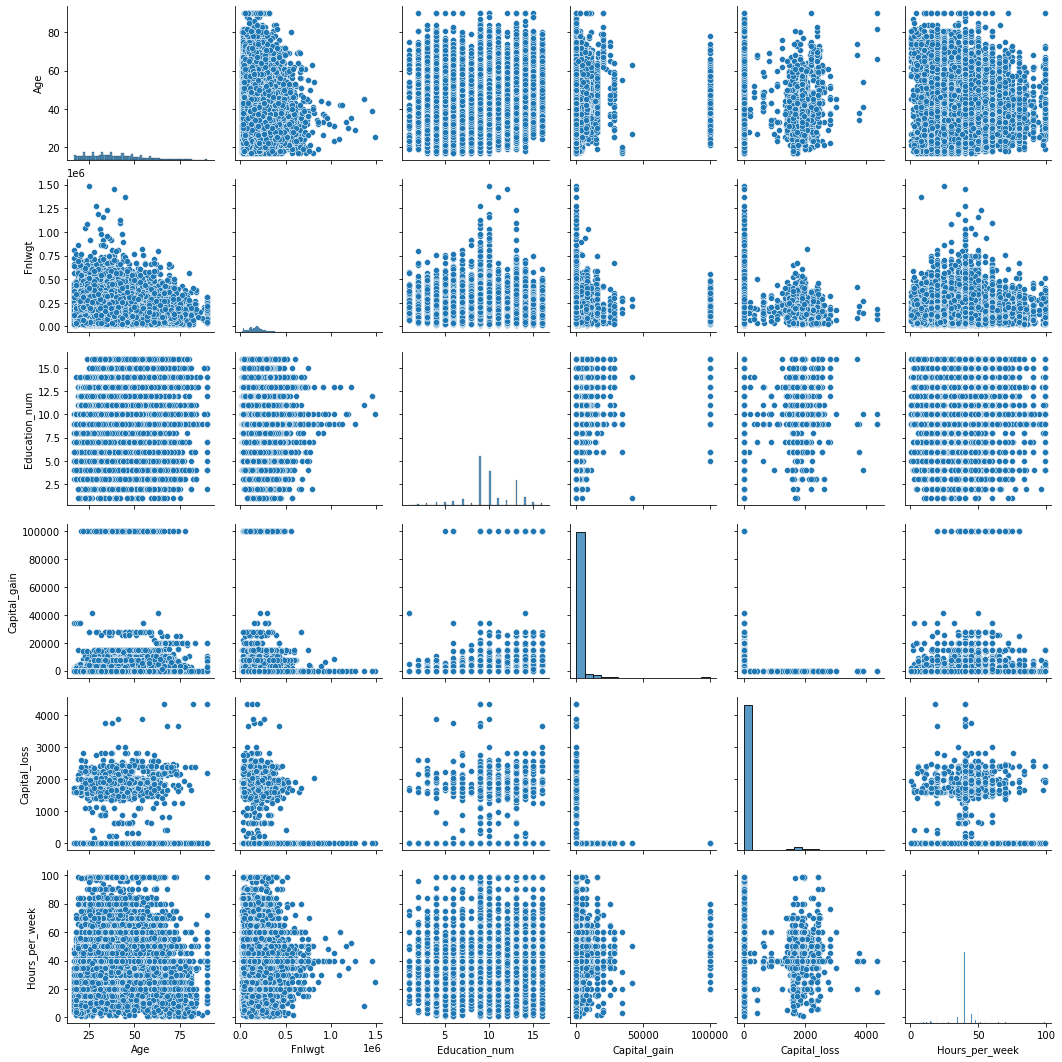

In [80]:
sns.pairplot(df)

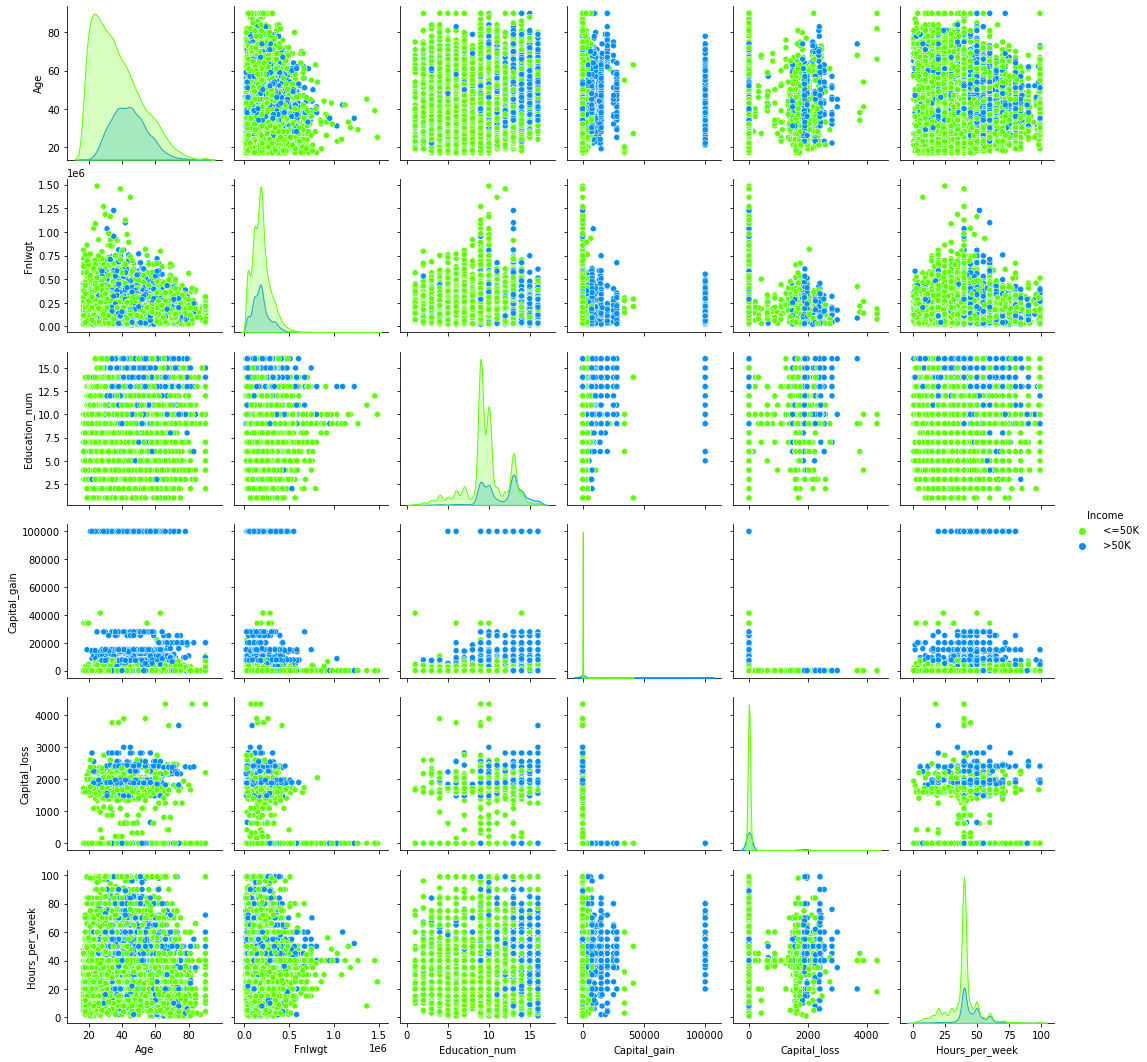

In [81]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Income",palette="gist_rainbow")

# Observation:
- Above are the pair plots of df.And there are some extreme outliers in the dataset.And some skewness also present.

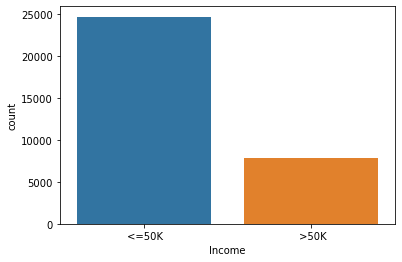

In [26]:
#Count plot for Income
sns.countplot(df['Income']);

# Observation
- Most of the people have the income less than or equal to 50K. We can also observe that data imbalance issue.

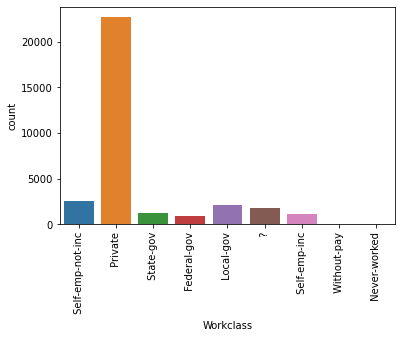

In [30]:
#Count plot for Education
sns.countplot(df['Workclass'])
plt.xticks(rotation=90)
plt.show()

# Observation
- The count of Private work class is high compare to others. This means the people working in private sectors are have high count and the people who never worked have least count.

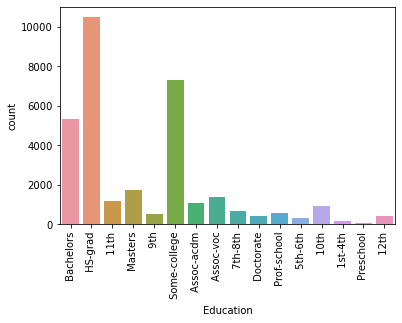

In [31]:
#Count plot for Education
sns.countplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The count of High-School is high followed by Secondary-School. Most of the people have their High School graduation with count more than 10K and the count of PhD is very less compare to others.

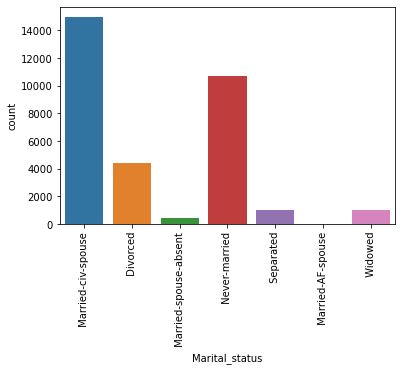

In [33]:
#Count plot for Education
sns.countplot(df['Marital_status'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The people who got married have high counts followed by the Singles or never married people.

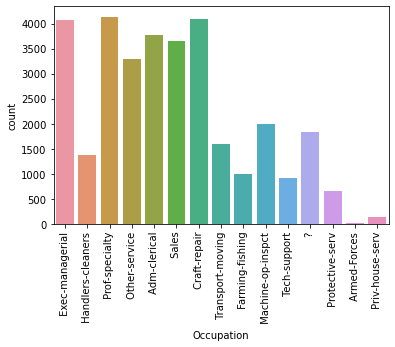

In [34]:
#Count plot for Education
sns.countplot(df['Occupation'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The people who are in the position of Prof-speciality have highest count and the people in the position Armed-Forces have very least counts.

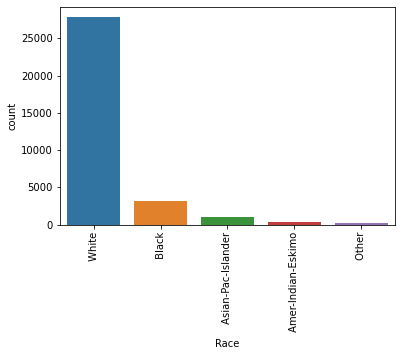

In [37]:
#Count plot for Education
sns.countplot(df['Race'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The white race people are like more compare to others

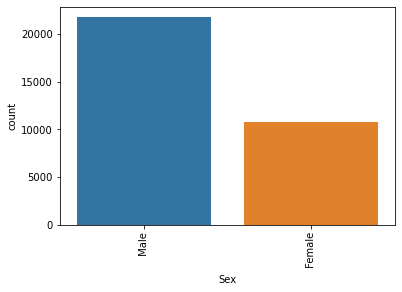

In [36]:
#Count plot for Education
sns.countplot(df['Sex'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- Total there are more than 20k Male and greater than 10k are female

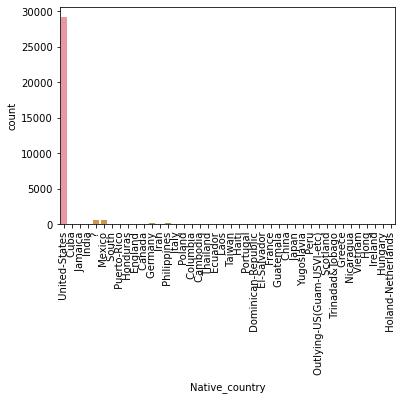

In [35]:
#Count plot for Education
sns.countplot(df['Native_country'])
plt.xticks(rotation=90)
plt.show()

# Observation:
- The United States country has highest count of around 29K and other countries have very less counts.

## <span style='background :yellow' > Numerical Variables </span>

In [38]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != "O"]

In [39]:
numerical_features

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

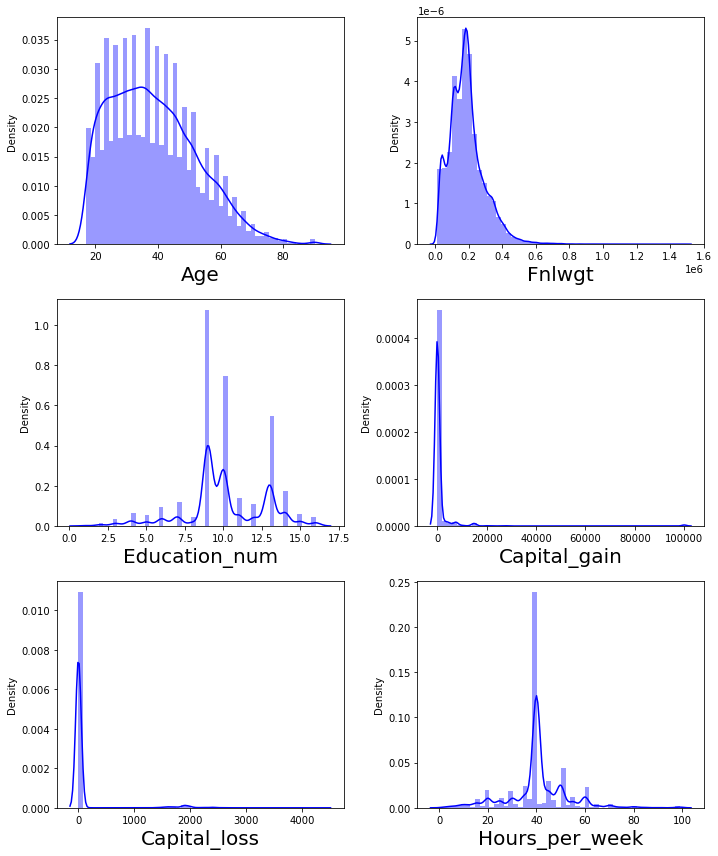

In [54]:
# Checking how the data has been distriubted in each numerical column

plt.figure(figsize=(10,12),facecolor='White')
plotnumber=1
for column in numerical_features:
    if plotnumber<=6:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[column],color="Blue")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()


## <span style='background :yellow' >To Check the relation between target variable and independent variable </span>

 Male      21774
 Female    10762
Name: Sex, dtype: int64


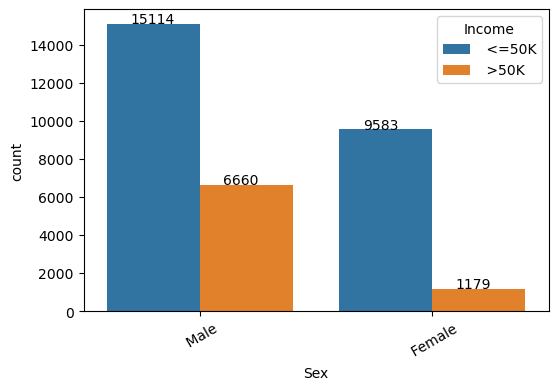

In [56]:
# Countplot for 
plt.figure(dpi=100)
plot = sns.countplot('Sex',data=df, hue='Income')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.Sex.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

# Observation:
- Total there are 6660 Male are getting salary more than 50K and 1179 female are getting salary more than 50k

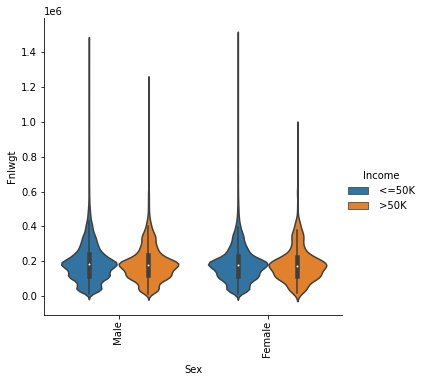

In [60]:
# Let's plot catplot for Sex and Fnlwgt
sns.catplot(x = "Sex", y = "Fnlwgt", hue = "Income", kind = "violin", data=df, )
plt.xticks(rotation=90);

# Observation
- Both for male and female the Fnlwgt is same and they have same income also.m

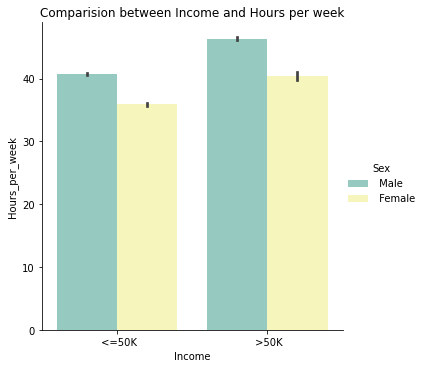

In [65]:
# Visualizing the number of Hours per week with income
sns.catplot(x='Income',y='Hours_per_week', data=df,kind='bar',hue="Sex",palette="Set3");
plt.title('Comparision between Income and Hours per week')
plt.show()

# Observation:
- This shows how the income is related to the hours per week. The income is >50K when the Hours is high for both male and female.

In [ ]:
# Visualizing the relation between Education and Income of the people
plt.figure(figsize=(10,6))
sns.countplot(df["Education"],hue=df["Education"],palette="PuBuGn_r" )
plt.title("Comparision between Education and Income")
plt.xticks(rotation=90)
plt.show()

 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64


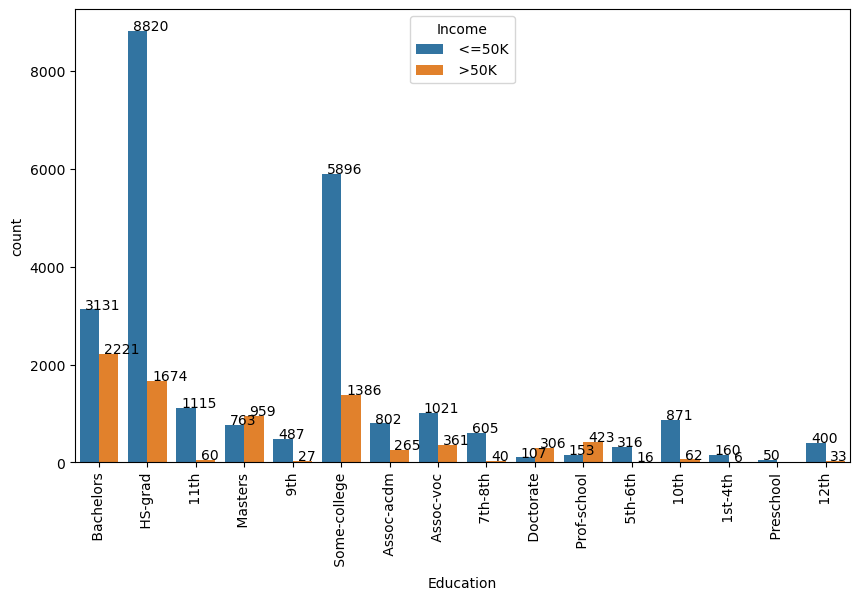

In [68]:
# Countplot for 
plt.figure(dpi=100,figsize=(10,6))
plot = sns.countplot('Education',data=df, hue='Income')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
print(df.Education.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

# Observation
- The people who completed theie high school have income <=50K followed by the people who done their Secondary School. Also the people who done their Graduation they are earning more income that is >50K.

9     10494
10     7282
13     5352
14     1722
11     1382
7      1175
12     1067
6       933
4       645
15      576
5       514
8       433
16      413
3       332
2       166
1        50
Name: Education_num, dtype: int64


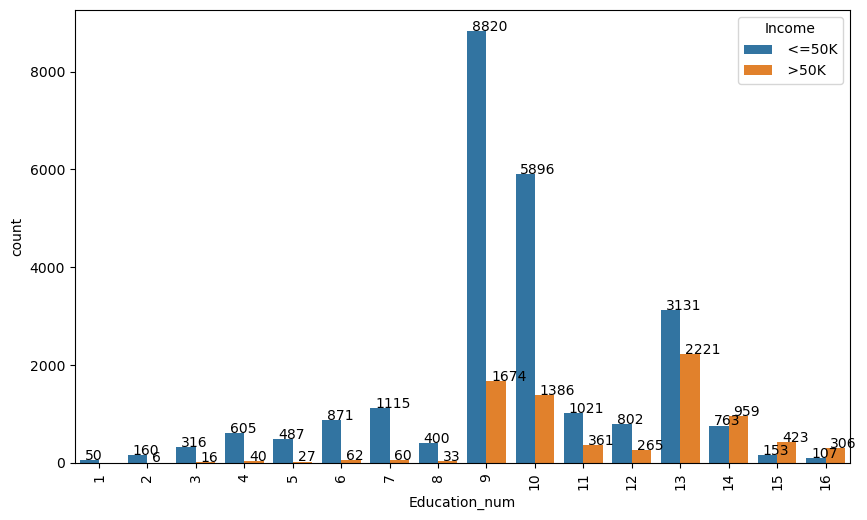

In [70]:
# Countplot for 
plt.figure(dpi=100,figsize=(10,6))
plot = sns.countplot('Education_num',data=df, hue='Income')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
print(df.Education_num.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

# Observation
- The Income is more than 50K for the people having high education number. Here both gender have the income more than 50K.

 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


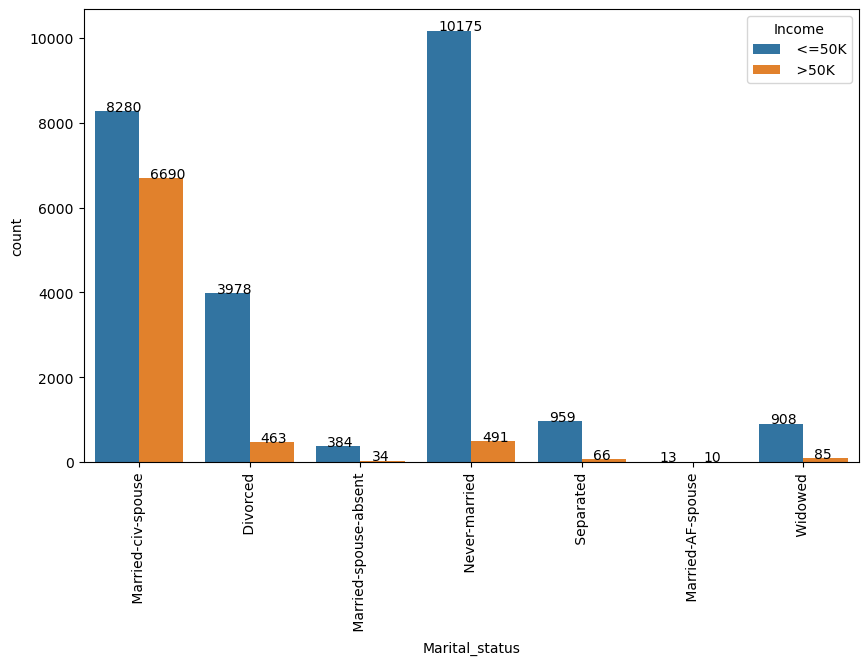

In [71]:
# Countplot for 
plt.figure(dpi=100,figsize=(10,6))
plot = sns.countplot('Marital_status',data=df, hue='Income')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
print(df.Marital_status.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

# Observation
- Married people getting income >50K compare to others. and more people who are Singles those getting <=50K.

 Prof-specialty       4136
 Craft-repair         4094
 Exec-managerial      4065
 Adm-clerical         3767
 Sales                3650
 Other-service        3291
 Machine-op-inspct    2000
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1369
 Farming-fishing       992
 Tech-support          927
 Protective-serv       649
 Priv-house-serv       147
 Armed-Forces            9
Name: Occupation, dtype: int64


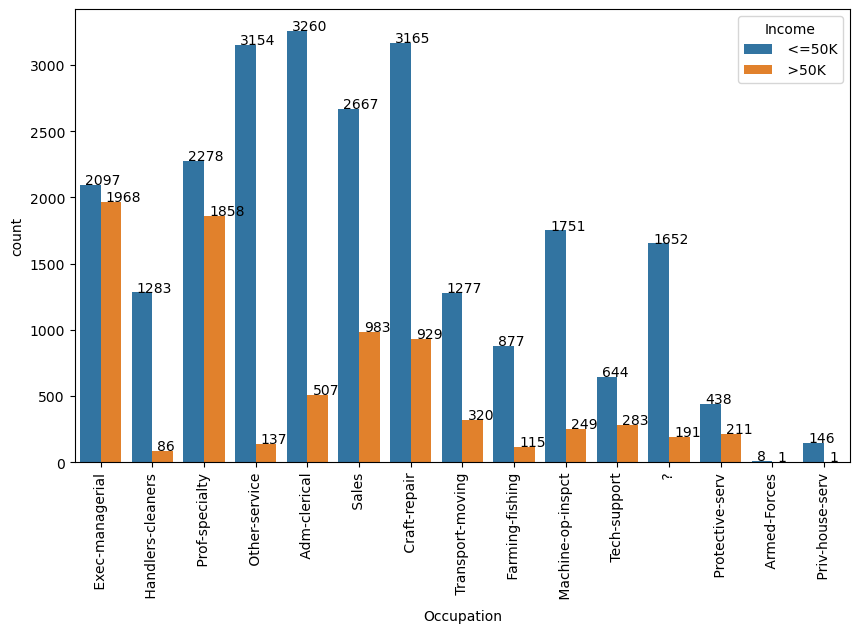

In [72]:
# Countplot for 
plt.figure(dpi=100,figsize=(10,6))
plot = sns.countplot('Occupation',data=df, hue='Income')
plot.set_xticklabels(plot.get_xticklabels(),rotation = 90)
print(df.Occupation.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))

# Observation:
- The people in the position Prof-speciality and Exce-managerial have the income more than 50K.
Also the people who are in the position Prof_Speciality, Other services, Adm-clerical and craft repair they have income less than 50K.


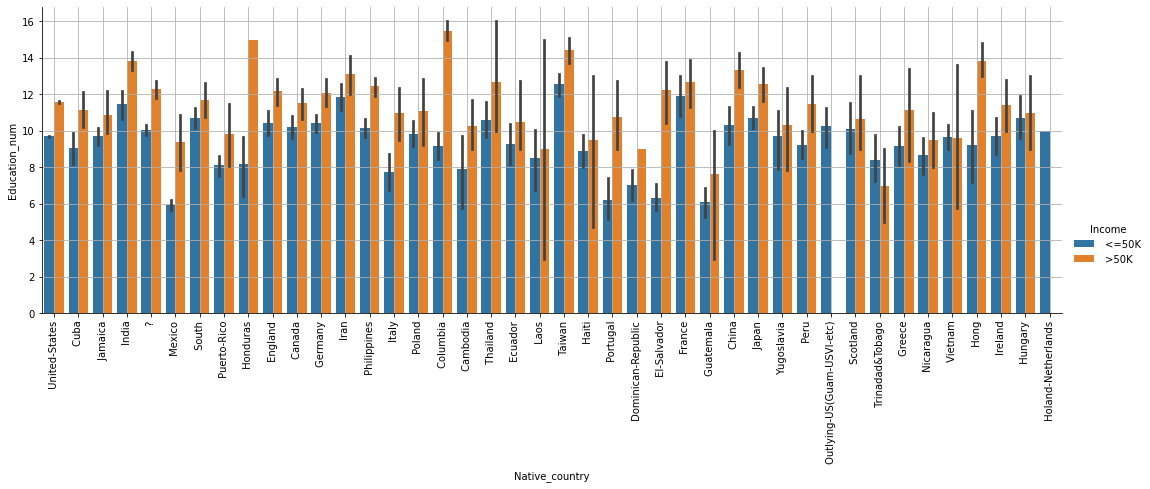

In [79]:
price_region =sns.catplot(x="Native_country",y="Education_num",data=df,kind="bar",hue="Income",aspect=3)
price_region.set_xticklabels(rotation=90)
plt.grid();

# Observation:
- The countries having high education numbers have high income that is more than 50K.

## <span style='background :yellow' >To Check the skewness in data </span>

In [76]:
df_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales           -0.882266
dtype: float64

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

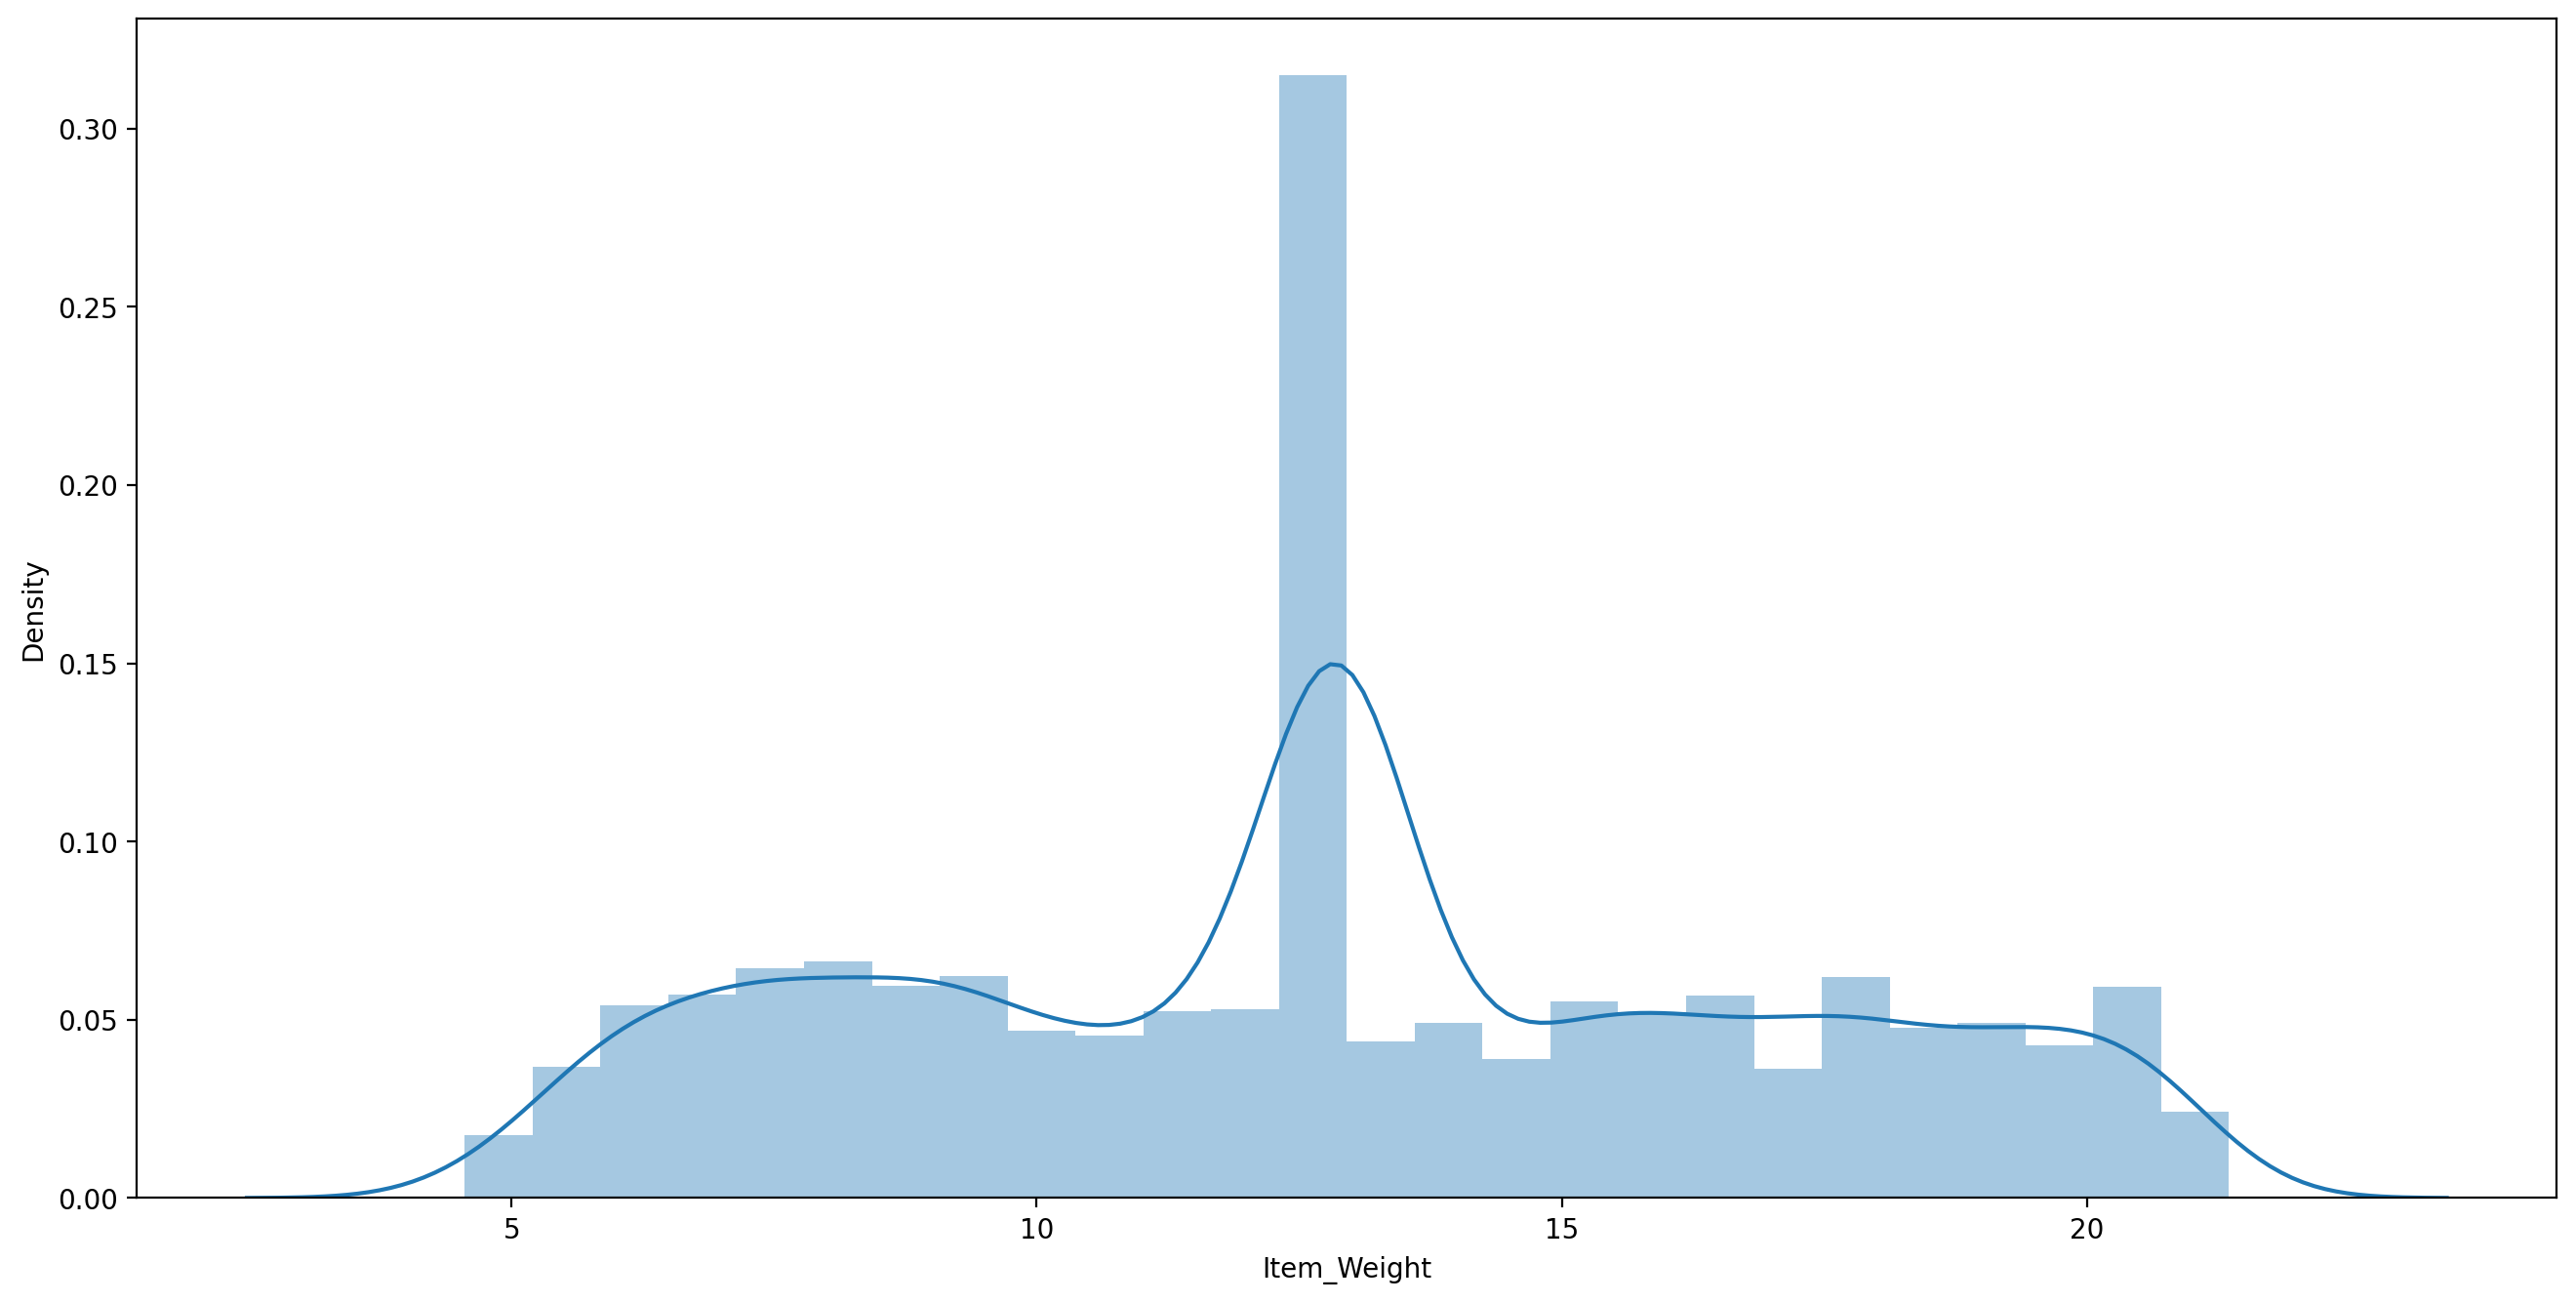

In [77]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_Weight"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

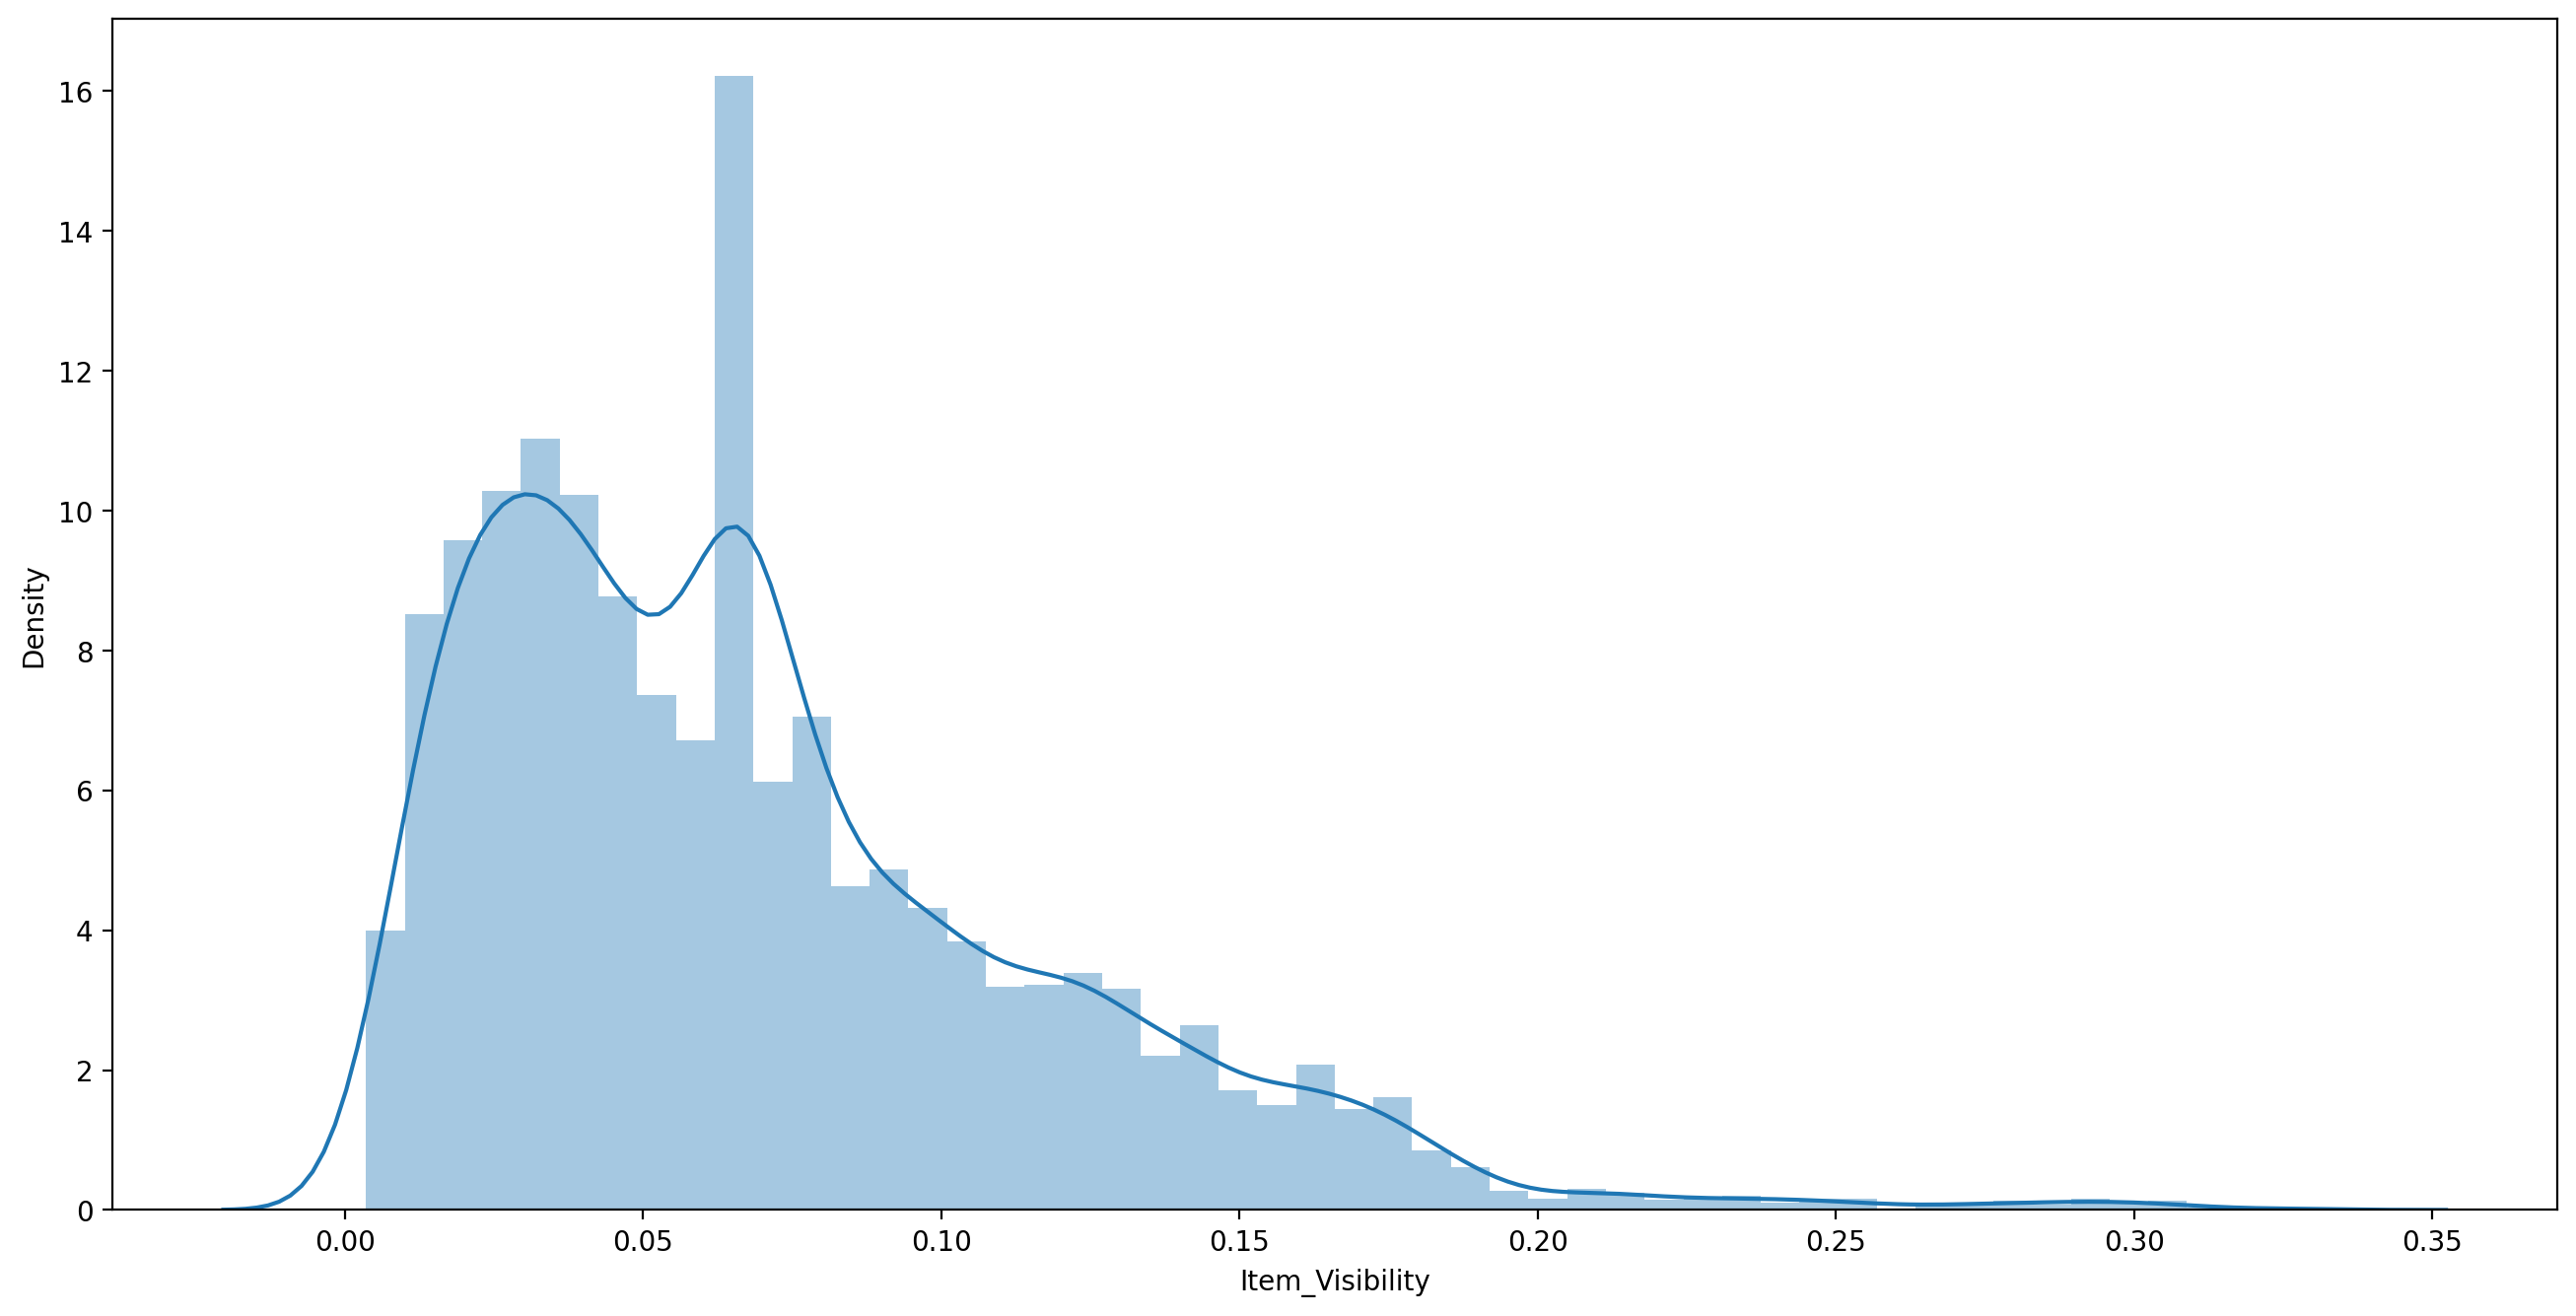

In [78]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_Visibility"])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

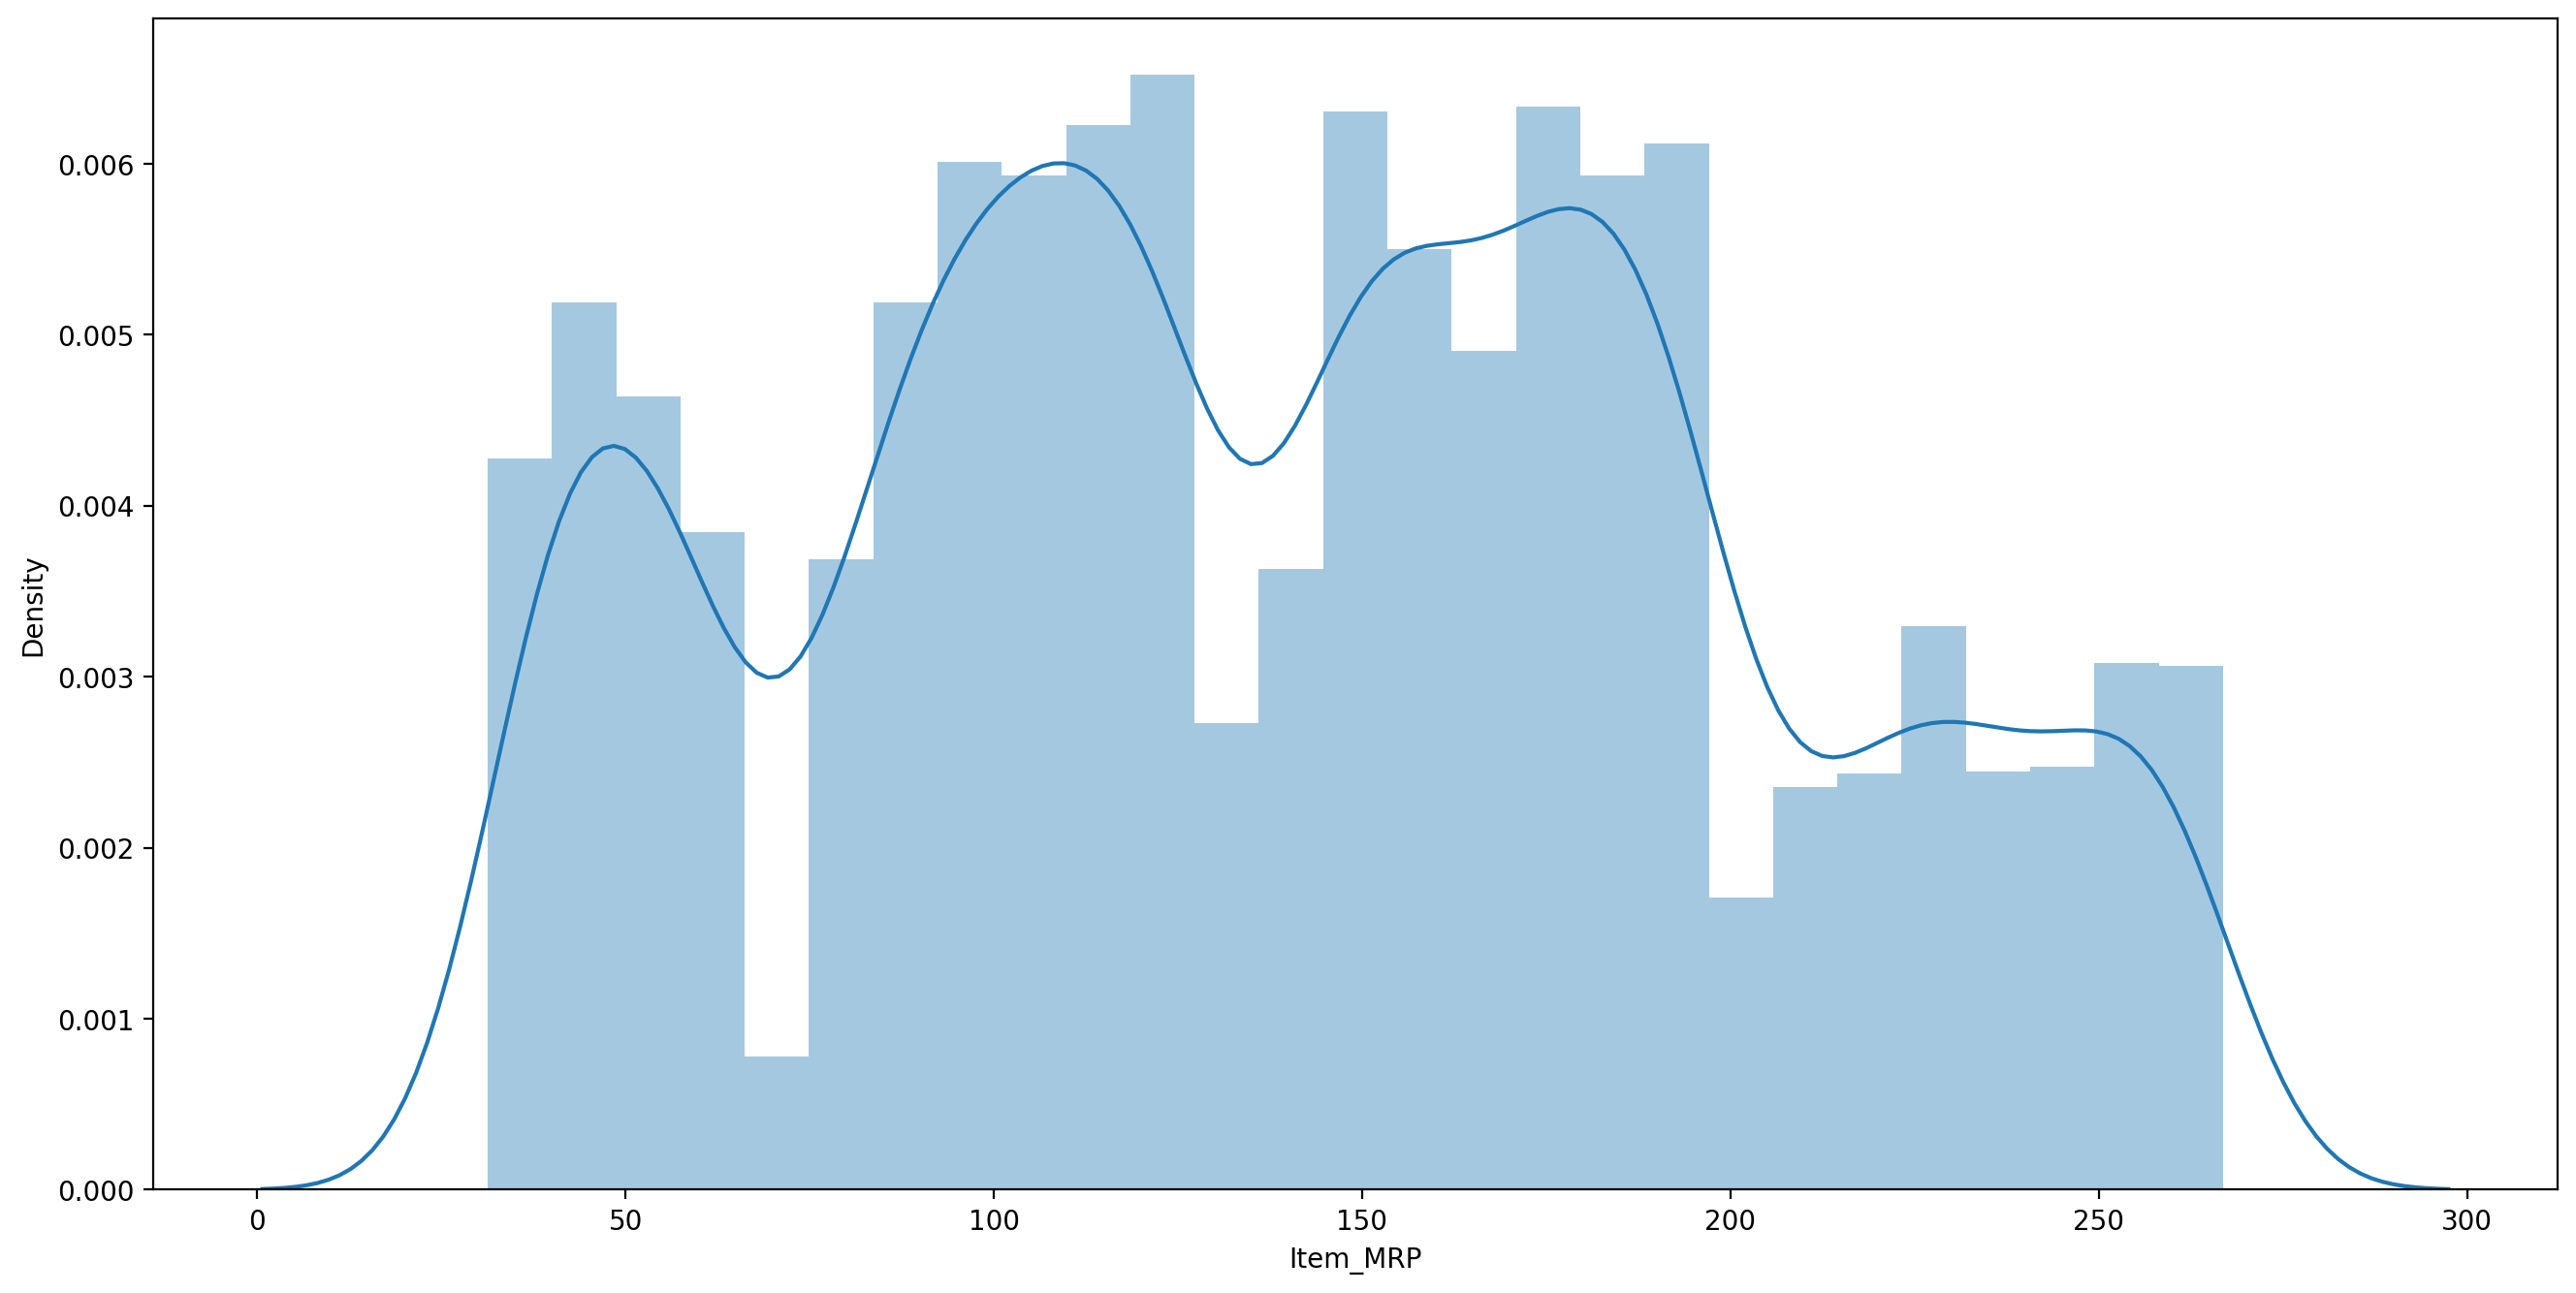

In [79]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Item_MRP"])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

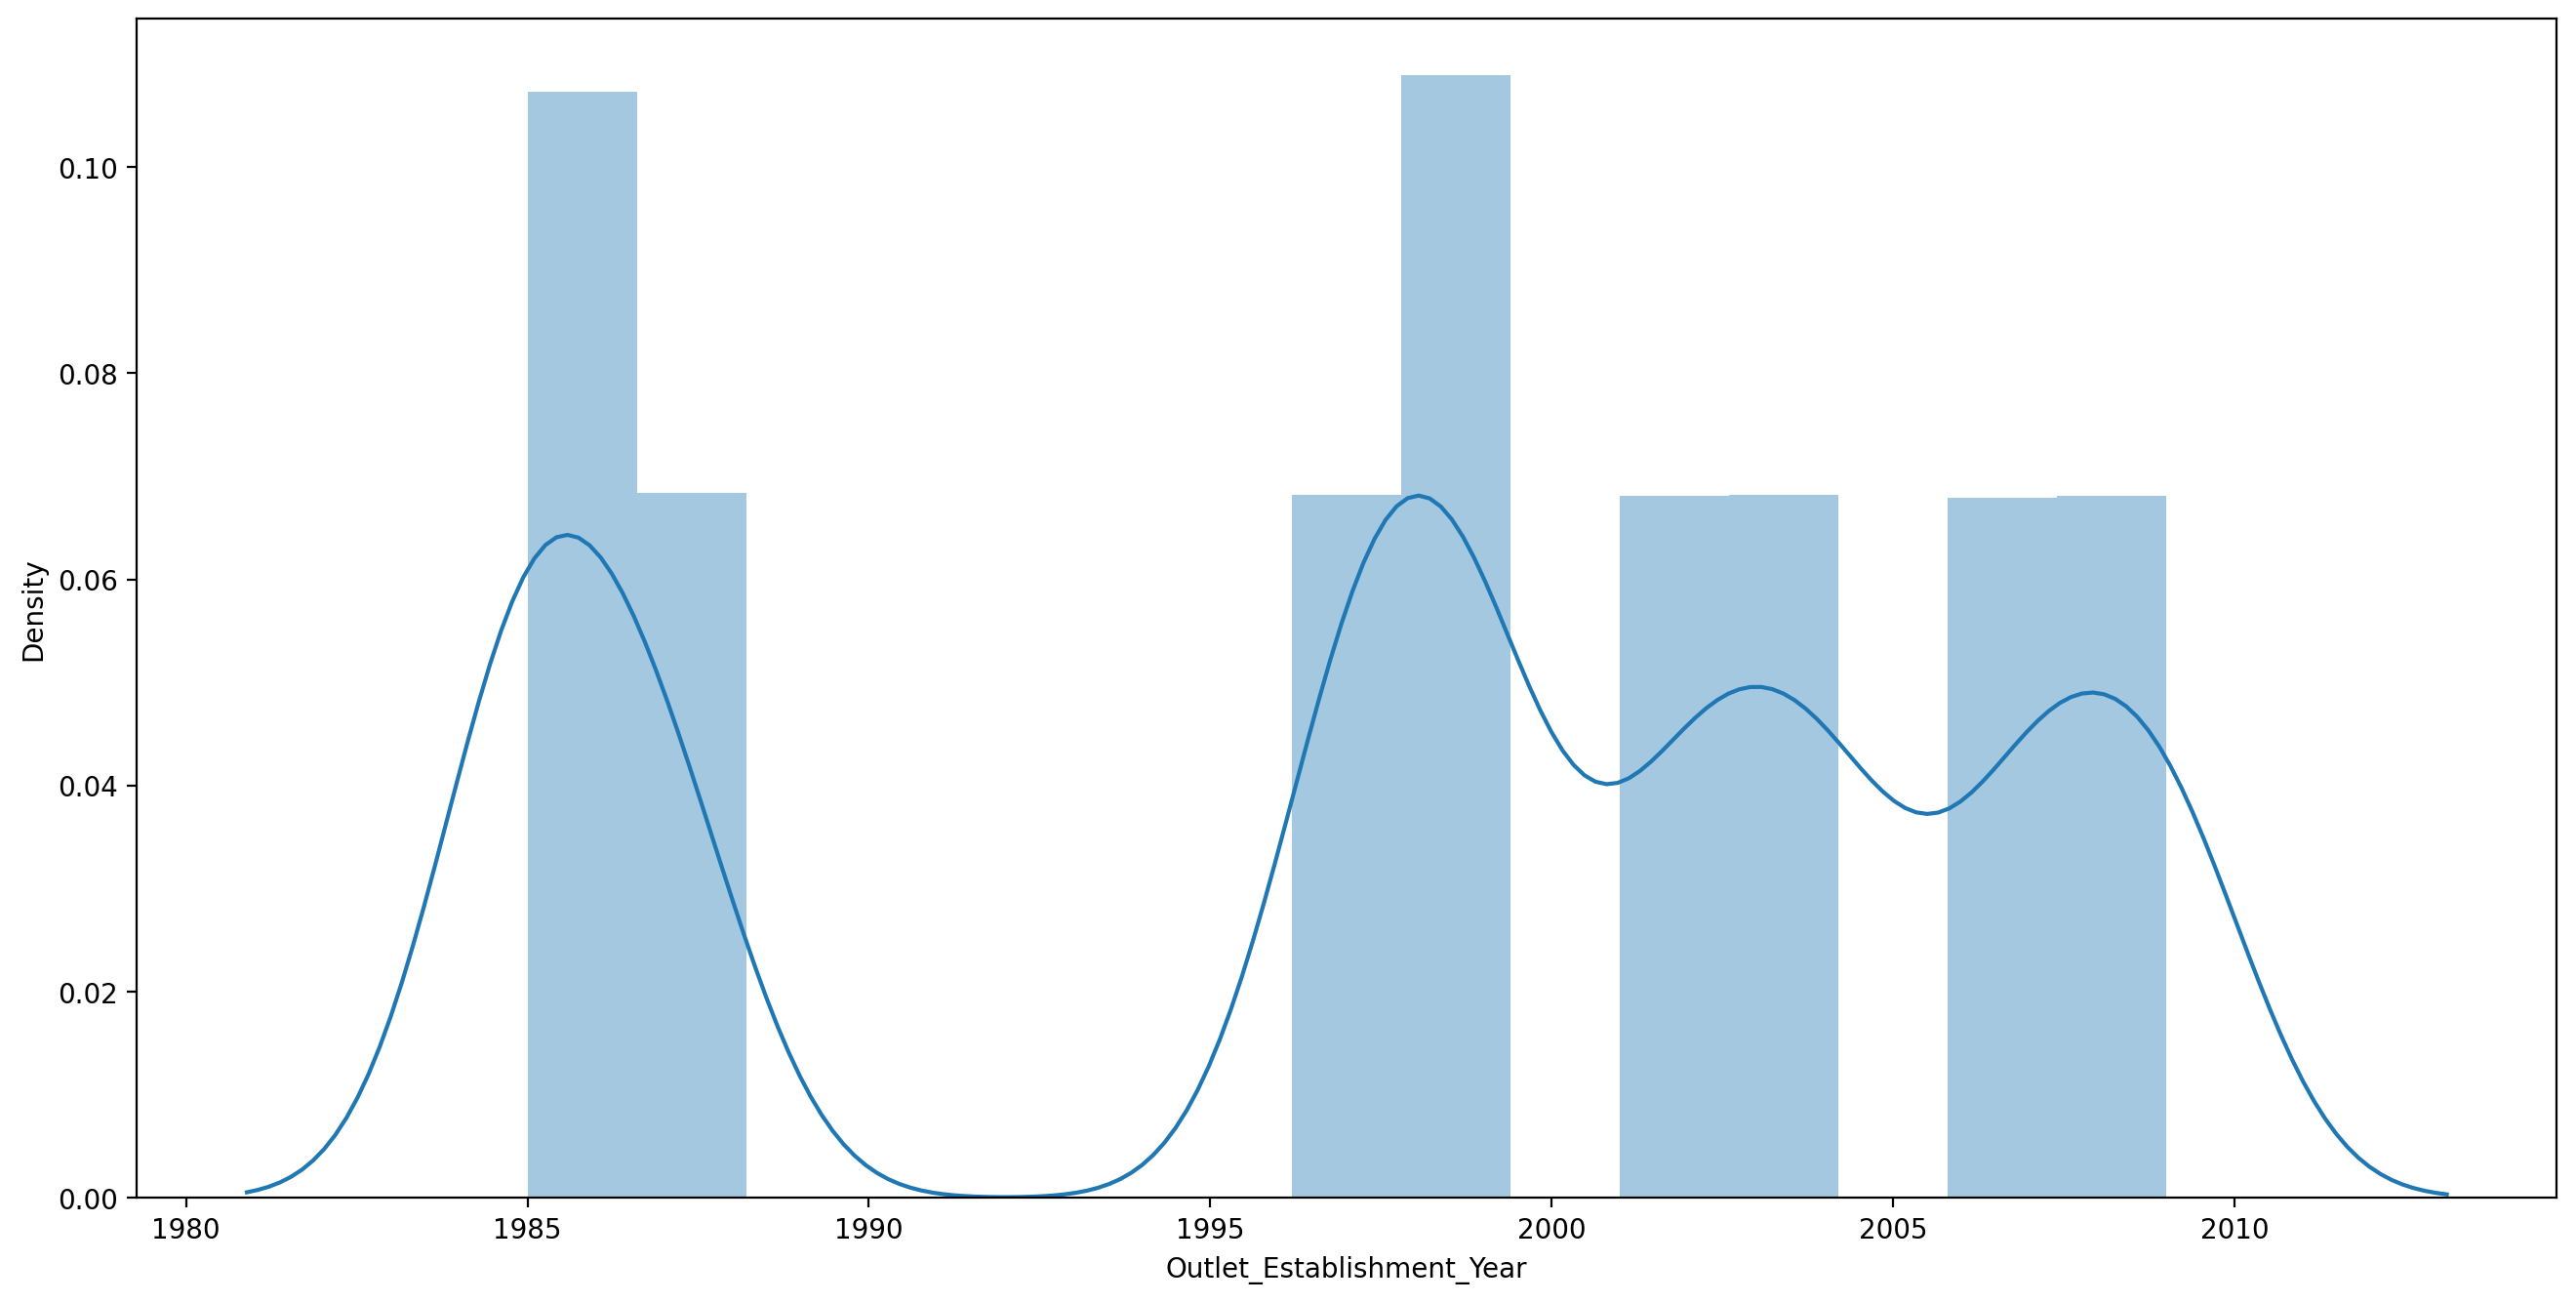

In [80]:
plt.figure(figsize=(16,8), dpi=200)
sns.distplot(df_train["Outlet_Establishment_Year"])

<AxesSubplot:>

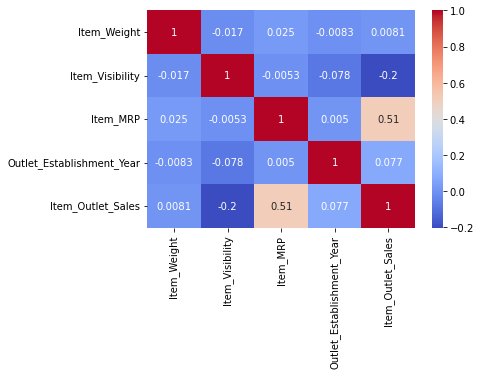

In [81]:
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

# To remove the skewness log transformation is used

In [82]:
df_train['Item_Outlet_Sales'] = np.log(1+df_train['Item_Outlet_Sales'])

In [83]:
df_train.corr()["Item_Outlet_Sales"].sort_values()

Item_Visibility             -0.208357
Item_Weight                  0.007100
Outlet_Establishment_Year    0.094242
Item_MRP                     0.487399
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

In [89]:
le = LabelEncoder()
var_mod = df_train.select_dtypes(include='object').columns
for i in var_mod:
    df_train[i] = le.fit_transform(df_train[i])
    
for i in var_mod:
    df_test[i] = le.fit_transform(df_test[i])

In [90]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type'],
      dtype='object')

## <span style='background :yellow' >variance_inflation_factor</span>

In [302]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
def calc_vif(df_train):
    vif=pd.DataFrame()
    vif["variables"]=df_train.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df_train.values,i) for i in range(df_train.shape[1])]
    return(vif)

In [94]:
calc_vif(df_train)

,variables,VIF FACTOR
0,Item_Identifier,10.598470
1,Item_Weight,10.317847
2,Item_Fat_Content,4.760126
3,Item_Visibility,3.280944
4,Item_Type,3.981796
5,Item_MRP,9.311450
6,Outlet_Identifier,15.820670
7,Outlet_Establishment_Year,498.479015
8,Outlet_Size,5.190150
9,Outlet_Location_Type,14.912867


In [95]:
df_train.drop('Outlet_Establishment_Year', inplace=True, axis=1)

In [96]:
df_train.skew()

Item_Identifier        -0.008877
Item_Weight             0.090561
Item_Fat_Content        0.376665
Item_Visibility         1.286877
Item_Type               0.101655
Item_MRP                0.127202
Outlet_Identifier      -0.059861
Outlet_Size            -0.131895
Outlet_Location_Type   -0.209093
Outlet_Type             0.927438
Item_Outlet_Sales      -1.272919
New_Item_Type           0.114510
dtype: float64

## <span style='background :yellow' > Outlier </span>

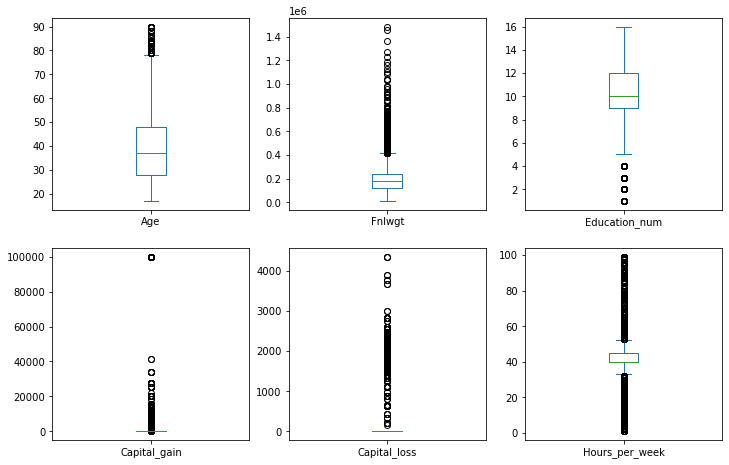

In [82]:
df.plot(kind='box',figsize=(12,12),layout=(3,3),sharex=False,subplots=True);

 ## <span style='background :yellow' >To Remove Outlier ZScore Method Is used</span>

In [83]:
features = df[["Age","Education_num","Hours_per_week"]]

In [84]:
from scipy.stats import zscore
z=np.abs(zscore(features))
z

,Age,Education_num,Hours_per_week
0,0.836961,1.134817,2.222450
1,0.042934,0.420646,0.035664
2,1.056935,1.198377,0.035664
3,0.776180,1.134817,0.035664
4,0.116259,1.523683,0.035664
...,...,...,...
32555,0.849505,0.745951,0.197648
32556,0.103715,0.420646,0.035664
32557,1.423558,0.420646,0.035664
32558,1.216128,0.420646,1.655506


In [85]:
# Creating new dataframe
df_new = df[(z<3).all(axis=1)] 
df_new

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [86]:
# Shape of original dataset
df.shape

(32536, 3)

In [ ]:
- Before removing the outliers we had 32560 rows and 15 columns in our dataset.

In [ ]:
# Shape of new dataset
df_new.shape

- After removing the outliers we have 31794 rows and 15 columns.

# <span style='background :yellow' >Percentage Data Loss</span>

In [88]:
Percentage_data_loss = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
Percentage_data_loss

2.342021145807721

- Here we are losing only 2% data by zscore method.

In [ ]:
## <span style='background :yellow' >Label Encoder</span>

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_new['Education']=le.fit_transform(df_new['Education'])
df_new['Workclass'] = le.fit_transform(df_new['Workclass'])
df_new['Marital_status'] = le.fit_transform(df_new['Marital_status'])
df_new['Occupation'] = le.fit_transform(df_new['Occupation'])
df_new['Relationship'] = le.fit_transform(df_new['Relationship'])
df_new['Race'] = le.fit_transform(df_new['Race'])
df_new['Sex'] = le.fit_transform(df_new['Sex'])
df_new['Native_country'] = le.fit_transform(df_new['Native_country'])
df_new['Income'] = le.fit_transform(df_new['Income']) 

In [ ]:
df_new

In [ ]:
## Statistical summary of data
df_new.describe()

In [ ]:
Skewness

In [ ]:
df_new.skew()

From the above we can see high skewness is observed in fnlwgt,capital-gain,capital-loss as fnlwgt is not an important feature we will drop that, and for other we will normalize data after spliting.

In [ ]:
sns.distplot(df_new["Age"],color="purple",kde_kws={"shade": True},hist=False)

In [ ]:
sns.distplot(df_new["Education_num"],color="purple",kde_kws={"shade": True},hist=False)

In [ ]:
sns.distplot(df_new["Hours_per_week"],color="purple",kde_kws={"shade": True},hist=False)

# Obervation
- We can see there is no skewness.

In [ ]:
## <span style='background :yellow' > Checking the Correlation </span>

In [ ]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

Education seems to be most correlated with Income (0.34), apart from that Age, Hours_per_week and Capital_gain are also very much correlated with Income at 0.23, 0.23 and 0.22 respectively.

Final Weight seems to be least correlated with Income at -0.01.

In [ ]:
df_new.corr()

This gives the correlation between the denpendent and independent variables. We can visualize this by plotting heat map.

In [115]:

# Visualizing the correlation matrix by plotting heat map.
plt.figure(figsize=(20,15))
sns.heatmap(df_new.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="coolwarm")
plt.yticks(rotation=0);

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1
1,8,5.920,3,0.019278,14,48.2692,3,2009,1,2,2
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1
3,1121,19.200,3,0.066132,6,182.0950,0,1998,3,2,0
4,1297,8.930,2,0.066132,9,53.8614,1,1987,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1
8519,897,8.380,3,0.046982,0,108.1570,7,2002,3,1,1
8520,1357,10.600,2,0.035186,8,85.1224,6,2004,2,1,1
8521,681,7.210,3,0.145221,13,103.1332,3,2009,1,2,2


In [ ]:
There is no multicolinearity issue.
Workclass and Fnlwgt has very less correlation with target.
Native_country, Occupation, Race and Education has less correlation with target column.
The columns Education_num, Age, Sex and Hours_per_week have positive correlation with the target.

In [ ]:
Visualizing the correlation between label and features using bar plot

In [116]:
df_train_x.skew().sort_values()

Outlet_Establishment_Year   -0.418101
Outlet_Location_Type        -0.214850
Outlet_Size                 -0.107126
Outlet_Identifier           -0.078015
Item_Identifier             -0.011281
Item_Weight                  0.088499
Item_Type                    0.096825
Item_MRP                     0.121193
Item_Fat_Content             0.127666
Item_Visibility              0.870117
Outlet_Type                  0.971764
dtype: float64

## <span style='background :yellow' >Scaling the independant variable (x) to get all the columns in a standard scale</span>


In [117]:
sc=StandardScaler()
x1=sc.fit_transform(df_train_x)
x1

array([[-1.3869953 , -0.8389995 , -0.92730858, ..., -0.72666425,
        -1.38336831, -0.29253901],
       [-1.71520433, -1.63525534,  1.17953446, ..., -0.72666425,
         1.09429276,  0.980401  ],
       [-0.26487522,  1.09274542, -0.92730858, ..., -0.72666425,
        -1.38336831, -0.29253901],
       ...,
       [ 1.27637666, -0.53274726,  0.12611294, ...,  0.28257799,
        -0.14453777, -0.29253901],
       [-0.22274028, -1.33135888,  1.17953446, ..., -0.72666425,
         1.09429276,  0.980401  ],
       [-1.62206393,  0.45668306, -0.92730858, ...,  0.28257799,
        -1.38336831, -0.29253901]])

#  <span style='background :yellow' > Splitting the data set</span>

In [118]:
X.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [119]:
x = pd.DataFrame(x1,columns=X.columns)

## <span style='background :yellow' > Machine Learning Model</span>

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [143]:
lr = LinearRegression()

In [137]:
lr_acc = pd.DataFrame()

In [144]:
random_state = []
training_accuracy = []
testing_accuracy = []

In [145]:
lr_acc['random_state'] = random_state[:198]
lr_acc['training_accuracy'] = training_accuracy[:198]
lr_acc['testing_accuracy'] = testing_accuracy[:198]

In [146]:
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    random_state.append(i)
    training_accuracy.append(round(r2_score(y_train,pred_train), 2))
    testing_accuracy.append(round(r2_score(y_test,pred_test), 2))

In [147]:
lr_acc = pd.DataFrame()

In [148]:
lr_acc['random_state'] = random_state[:198]
lr_acc['training_accuracy'] = training_accuracy[:198]
lr_acc['testing_accuracy'] = testing_accuracy[:198]

In [149]:
lr_acc.sort_values('testing_accuracy').tail(1)

,random_state,training_accuracy,testing_accuracy
92,93,0.5,0.55


For random test 93 accuracy is 0.5,0.55

## <span style='background :yellow' > Machine Learning Model Prediction

In [153]:
def regressor(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)
    
    # Training the model
    model.fit(x_train, y_train)
    
    # Predicting y_test
    pred = model.predict(x_test)
    
    # Root Mean Square Error (RMSE)
    rmse = mean_squared_error(y_test, pred, squared=False)
    print("Root Mean Square Error is:", rmse)
    
    # R2 score
    r2 = r2_score(y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, x, y, cv=5).mean())*100
    print("Cross Validation Score is:", cv_score)
    
    # Result of r2 score - cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

#  <span style='background :yellow' > Tuning parameter for better results</span>

## 1.Random Forest Regressor

In [154]:

model=RandomForestRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.06751737691398665
R2 Score is: 69.19410925370634
Cross Validation Score is: 66.78677170625339
R2 Score - Cross Validation Score is 2.407337547452954


# 2.K Neighbors Regressor

In [155]:
model=KNeighborsRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.07248988118057569
R2 Score is: 64.48944795347083
Cross Validation Score is: 62.13794378004695
R2 Score - Cross Validation Score is 2.3515041734238764


# 3.SGD Regressor¶

In [156]:
model=SGDRegressor(penalty='l1', learning_rate='optimal')
regressor(model, x, y)

Root Mean Square Error is: 0.09386815337746174
R2 Score is: 40.455836749921424
Cross Validation Score is: 35.07361535121845
R2 Score - Cross Validation Score is 5.382221398702974


# 4.Gradient Boosting Regressor¶

In [157]:
model=GradientBoostingRegressor()
regressor(model, x, y)

Root Mean Square Error is: 0.06521373102579209
R2 Score is: 71.26039837252723
Cross Validation Score is: 70.41663319136934
R2 Score - Cross Validation Score is 0.8437651811578917


# 5.Ada Boost Regressor

In [158]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 0.07364721601363121
R2 Score is: 63.34651133013958
Cross Validation Score is: 63.06610670011714
R2 Score - Cross Validation Score is 0.28040463002243854


# 6.K Neighbors Regressor

In [159]:
model=AdaBoostRegressor(random_state=111)
regressor(model, x, y)

Root Mean Square Error is: 0.07364721601363121
R2 Score is: 63.34651133013958
Cross Validation Score is: 63.06610670011714
R2 Score - Cross Validation Score is 0.28040463002243854


## <span style='background :yellow' > Hyper parameter tuning</span>

In [160]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=97)

## 1.For Lasso

In [161]:
parameters = {'alpha':[100, 300], 'selection': ['cyclic', 'random'], 'max_iter': [500, 1000], 'random_state': [100, 500]}
ls = Lasso()
clf = GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)


ls=Lasso(alpha=100,random_state=100,max_iter=500,selection='cyclic')
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls = ls.predict(x_test)

ls1 = r2_score(y_test,pred_ls)
ls1


cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

{'alpha': 100, 'max_iter': 500, 'random_state': 100, 'selection': 'cyclic'}


-0.0007788976408099835

## 2.For Gradient Boosting

In [162]:
clf_gb=GridSearchCV(estimator=GradientBoostingRegressor(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [500]})

In [163]:
clf_gb.best_score_

0.6828485582546862

In [164]:
clf_gb.best_params_

{'n_estimators': 500}

In [165]:
clf_gb_df = pd.DataFrame(clf_gb.cv_results_)
clf_gb_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.769219,0.036797,0.006271,0.006854,500,{'n_estimators': 500},0.658743,0.690327,0.69616,0.719414,0.665885,0.68799,0.659371,0.680059,0.683707,0.686829,0.682849,0.017438,1


# 3.GridSearchCV

In [166]:
from sklearn.model_selection import GridSearchCV

In [167]:
RandomForestRegressor().get_params

<bound method BaseEstimator.get_params of RandomForestRegressor()>

In [168]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['mse', 'mae']
}

In [ ]:
GCV = GridSearchCV(estimator = RandomForestRegressor(), param_grid = param_grid, cv = 5)
GCV.fit(x_train, y_train)

In [ ]:
GCV.best_params_

# 4.RandomForestRegresson

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_features='auto', n_estimators= 200, max_depth=8, criterion='mae')
rfr.fit(x_train, y_train)
predrfr = rfr.predict(x_test)
print (r2_score(y_test, predrfr))
print (mean_squared_error(y_test, predrfr))

In [ ]:
cvs = cross_val_score(rfr, x, y, cv = 5)
print ('Cross Validation Score for Random forest model after hypertuning is :', cvs.mean())

### Consumption of Snack Foods, Fruits, Vegetables, Dairy, Frozen Foods, Canned and Household is more, compared to all other items, if we increase visibility of these items, we can increase sales


### Low consumption of breakfast, Seafood, Starchy Foods, So we need less visibility for th